## Instructions

* Import `stats` from the scipy module, along with `numpy` and `pandas`.
* Use Pandas to read the `crime_data.csv` provided in the Resources directory.

* Use `iloc` to isolate the year column.

* Use `iloc` to isolate the total violent crime rate, murder rate, and aggravated assault rate columns.

* Use `stats.linregress` to perform a linear regression with the year and violent crime rate columns.

* Use `stats.linregress` to perform a linear regression with the year and murder rate columns.

* Finally, use `stats.linregress` to perform a linear regression with the year and aggravated assault rate columns.

* Use the information returned by `stats.linregress` to create an equation for a line describing each of the linear regressions you performed (see the hint below).

  * You should end up with three separate lines.

* Use `subplots` to create a figure with subplots that share an x-axis.

* Use `plot` to plot each of the lines you created against the year.

* Display the plot.


In [29]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [12]:
crime_df = pd.read_csv('../Resources/crime_data.csv')
crime_df.head()

year   population  violent crime  violent crime rate  \
0  1994.0  260327021.0      1857670.0               713.6   
1  1995.0  262803276.0      1798792.0               684.5   
2  1996.0  265228572.0      1688540.0               636.6   
3  1997.0  267783607.0      1636096.0               611.0   
4  1998.0  270248003.0      1533887.0               567.6   

   murder and non-negligent manslaughter  \
0                                23326.0   
1                                21606.0   
2                                19645.0   
3                                18208.0   
4                                16974.0   

    murder and non-negligent manslaughter rate      rape  rape rate   robbery  \
0                                          9.0  102216.0       39.3  618949.0   
1                                          8.2   97470.0       37.1  580509.0   
2                                          7.4   96252.0       36.3  535594.0   
3                                          6.8   96153.0       35.9  498534.0   
4                                          6.3   93144.0       34.5  447186.0   

   robbery rate   aggravated assault  aggravated assault rate  property crime  \
0         237.8            1113179.0                    427.6      12131873.0   
1         220.9            1099207.0                    418.3      12063935.0   
2         201.9            1037049.0                    391.0      11805323.0   
3         186.2            1023201.0                    382.1      11558475.0   
4         165.5             976583.0                    361.4      10951827.0   

   property crime rate   burglary  burglary rate  larceny-theft  \
0               4660.2  2712774.0         1042.1      7879812.0   
1               4590.5  2593784.0          987.0      7997710.0   
2               4451.0  2506400.0          945.0      7904685.0   
3               4316.3  2460526.0          918.8      7743760.0   
4               4052.5  2332735.0          863.2      7376311.0   

   larceny-theft rate  motor vehicle theft  motor vehicle theft rate  
0              3026.9            1539287.0                     591.3  
1              3043.2            1472441.0                     560.3  
2              2980.3            1394238.0                     525.7  
3              2891.8            1354189.0                     505.7  
4              2729.5            1242781.0                     459.9

In [13]:
# Use `iloc` to isolate the year column.
year_col = crime_df.iloc[:,0]
year_col.head()

0    1994.0
1    1995.0
2    1996.0
3    1997.0
4    1998.0
Name: year, dtype: float64

In [14]:
# Use iloc to isolate the total violent crime rate, murder rate, and aggravated assault rate columns.
rates = crime_df.iloc[:, [3, 5, 11]]
rates.head()

violent crime rate   murder and non-negligent manslaughter rate  \
0               713.6                                          9.0   
1               684.5                                          8.2   
2               636.6                                          7.4   
3               611.0                                          6.8   
4               567.6                                          6.3   

   aggravated assault rate  
0                    427.6  
1                    418.3  
2                    391.0  
3                    382.1  
4                    361.4

In [46]:
# Use stats.linregress to perform a linear regression with the year and violent crime rate columns.
year_list = crime_df.iloc[:,0]
violent_list = rates.iloc[:,0]
murder_list = rates.iloc[:,1]
assault_list = rates.iloc[:,2]
#print(violent_list)
#print(murder_list)
#print(assault_list)

In [45]:
(vc_slope, vc_int,vc_r, vc_p, vc_stderr) = linregress(year_list, violent_list)
vc_fit = vc_slope * year_list + vc_int

<IPython.core.display.Javascript object>


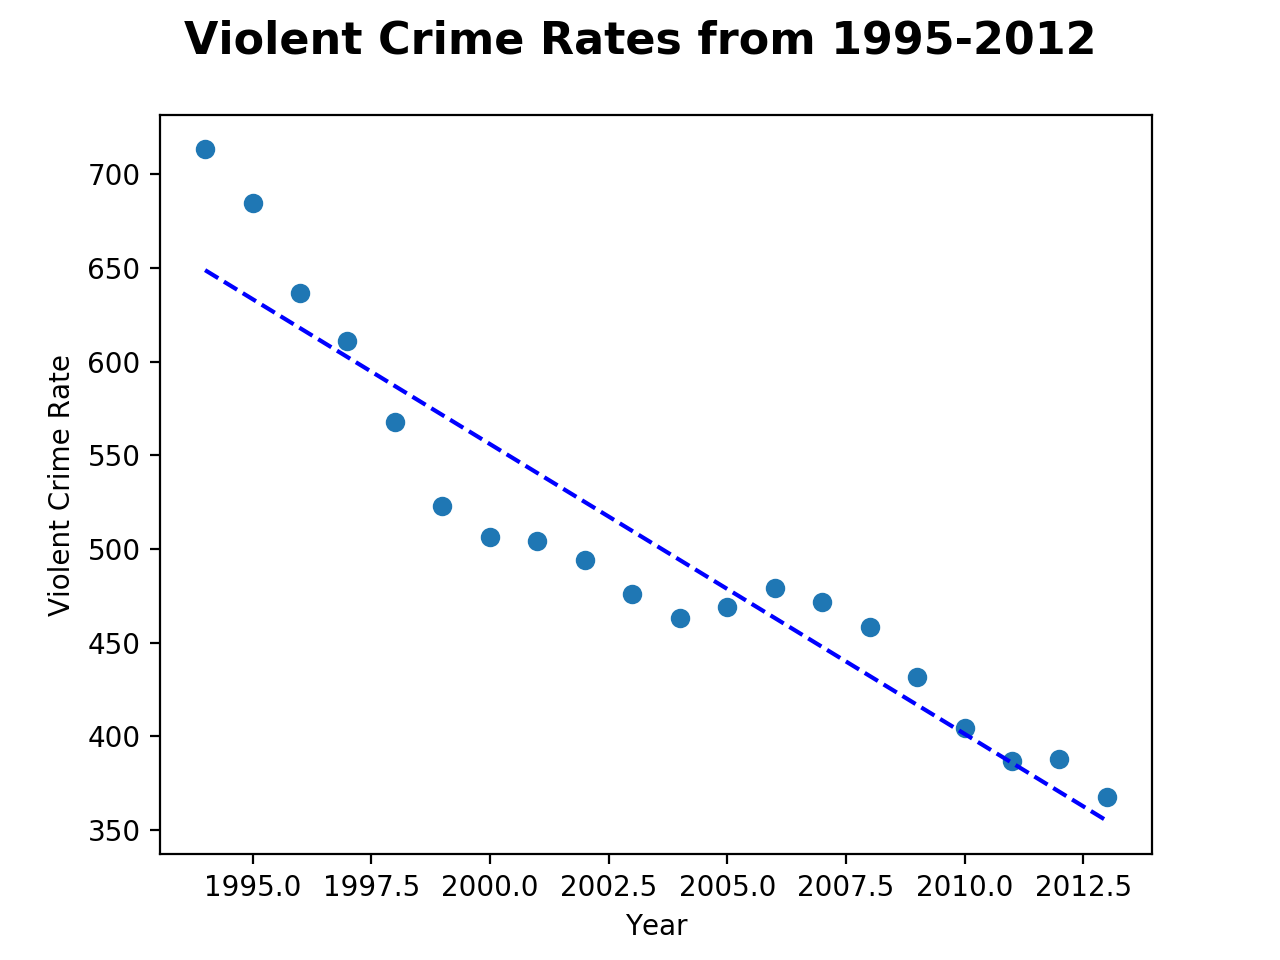

In [37]:
# Use stats.linregress to perform a linear regression with the year and murder rate columns.
fig, ax = plt.subplots()

fig.suptitle("Violent Crime Rates from 1995-2012", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Year")
ax.set_ylabel("Violent Crime Rate")

ax.plot(year_list, violent_list, linewidth=0, marker='o')
ax.plot(year_list, vc_fit, 'b--')

plt.show()

In [33]:
(mr_slope, mr_int, mr_r, mr_p, mr_stderr) = linregress(year_list, murder_list)
mr_fit = mr_slope * year_list + mr_int
mr_fit

0     7.491429
1     7.321278
2     7.151128
3     6.980977
4     6.810827
5     6.640677
6     6.470526
7     6.300376
8     6.130226
9     5.960075
10    5.789925
11    5.619774
12    5.449624
13    5.279474
14    5.109323
15    4.939173
16    4.769023
17    4.598872
18    4.428722
19    4.258571
Name: year, dtype: float64

<IPython.core.display.Javascript object>


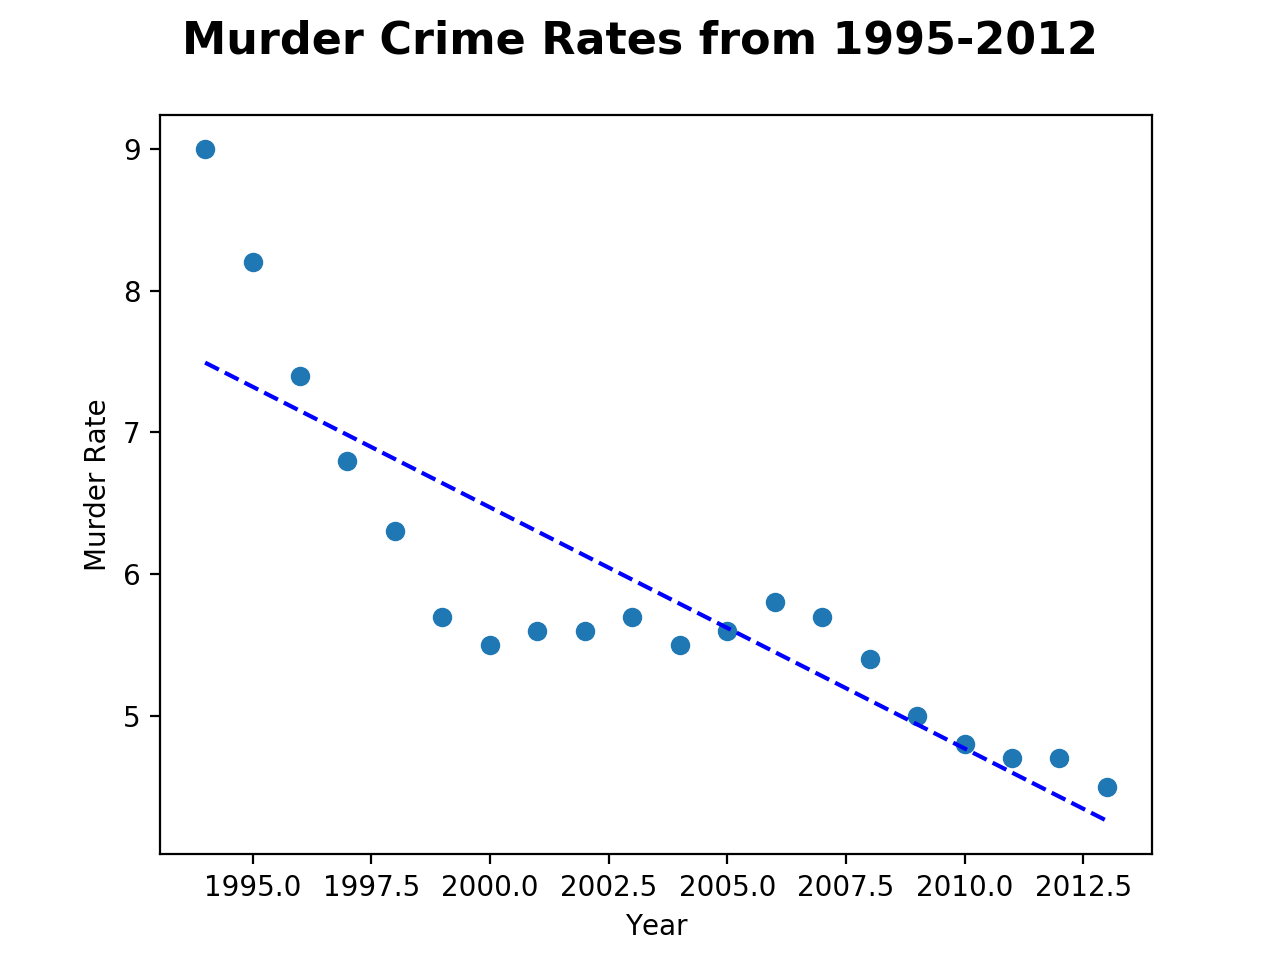

In [38]:
# Use stats.linregress to perform a linear regression with the year and murder rate columns.
fig, ax = plt.subplots()

fig.suptitle("Murder Crime Rates from 1995-2012", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Year")
ax.set_ylabel("Murder Rate")

ax.plot(year_list, murder_list, linewidth=0, marker='o')
ax.plot(year_list, mr_fit, 'b--')

plt.show()

In [44]:
(ar_slope, ar_int, ar_r, ar_p, ar_stderr) = linregress(year_list, assault_list)
ar_fit = ar_slope * year_list + ar_int

<IPython.core.display.Javascript object>


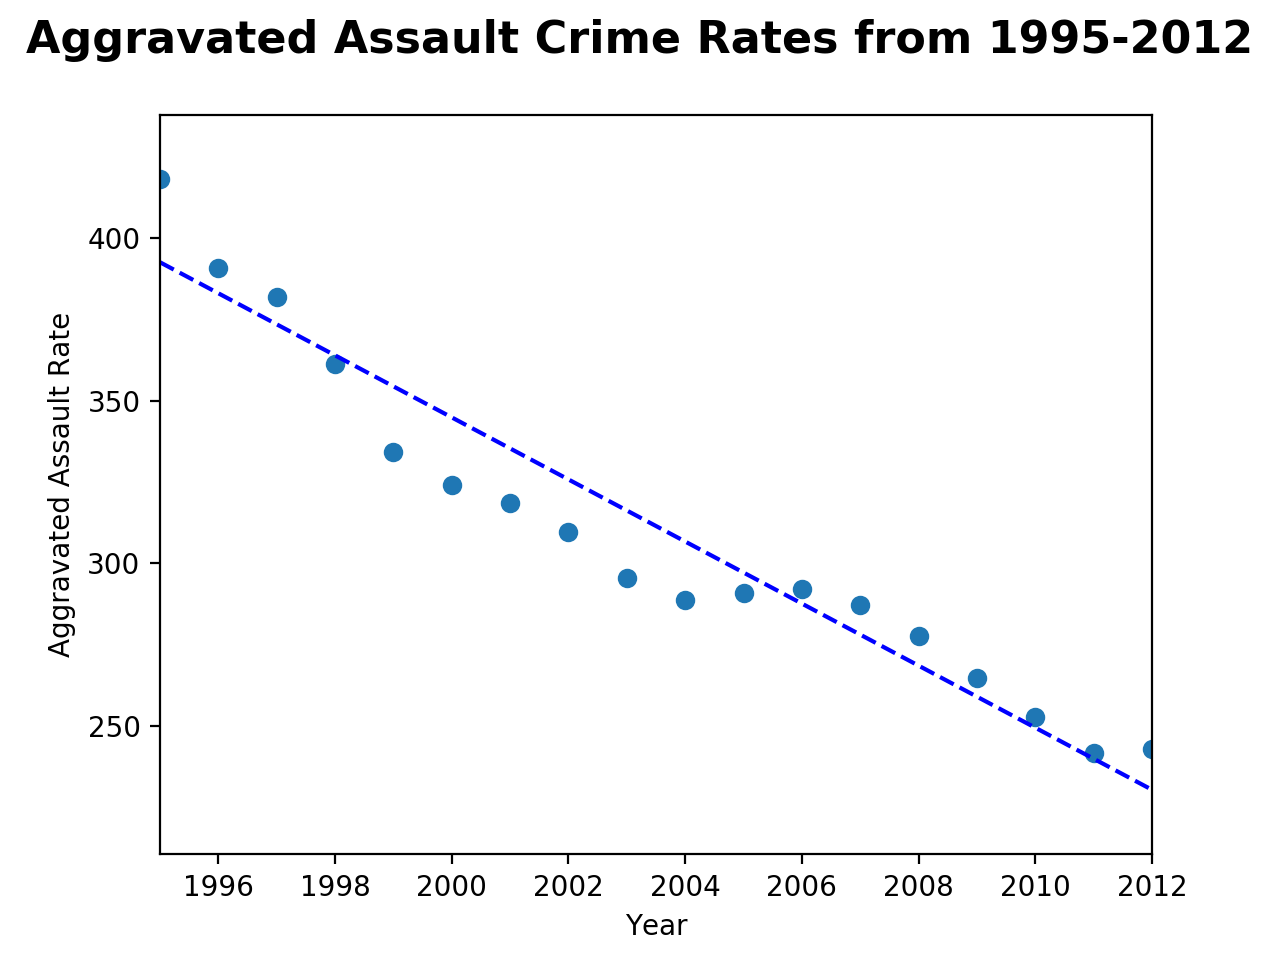

In [43]:
# Use stats.linregress to perform a linear regression with the year and murder rate columns.
fig, ax = plt.subplots()

fig.suptitle("Aggravated Assault Crime Rates from 1995-2012", fontsize=16, fontweight="bold")

ax.set_xlim(1995, 2012)
#ax.set_ylim(0, 10)

ax.set_xlabel("Year")
ax.set_ylabel("Aggravated Assault Rate")

ax.plot(year_list, assault_list, linewidth=0, marker='o')
ax.plot(year_list, ar_fit, 'b--')

plt.show()

In [48]:
year = 2019
print(f"The violent crime rate in 2019 will be {str(vc_slope * year + vc_int)}.")

The violent crime rate in 2019 will be 262.2137593984953.


In [ ]:
#fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

#ax1.plot(year, violent_list, marker="o")